In [1]:
from langgraph.graph import StateGraph, START, MessagesState
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
model = ChatOpenAI()

In [4]:
def call_model(state: MessagesState):
    response = model.invoke(state["messages"])
    return {"messages": [response]}

In [5]:
builder = StateGraph(MessagesState)
builder.add_node("call_model", call_model)
builder.add_edge(START, "call_model")

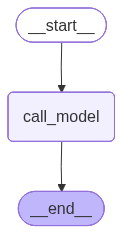

In [6]:
graph = builder.compile()
graph

In [28]:
graph.invoke({"messages": [{"role": "user", "content": "Hi! My name is Nitish."}]})

{'messages': [HumanMessage(content='Hi! My name is Nitish.', additional_kwargs={}, response_metadata={}, id='f42a3530-a266-4d3c-b985-e24af23ce549'),
  AIMessage(content='Nice to meet you, Nitish! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 15, 'total_tokens': 30, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CrUTl4YpEsHjFAOQzj5JaXuOm1Mx8', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b6155-ee3a-7512-b71f-73384ddaa79c-0', usage_metadata={'input_tokens': 15, 'output_tokens': 15, 'total_tokens': 30, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0

In [29]:
graph.invoke({"messages": [{"role": "user", "content": "What is my name?"}]})

{'messages': [HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}, id='c106a290-08b6-483a-81da-0736c07d8594'),
  AIMessage(content="I'm sorry, I cannot know your name as I am a computer program and do not have the capability to access personal information.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 12, 'total_tokens': 38, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CrUTw32XYzUtayqCbraZSkJ9r2zif', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b6156-1e8b-7bb1-a444-e11bb84a4a4e-0', usage_metadata={'input_tokens': 12, 'output_tokens': 26, 'total_tokens': 38, 'input_token_details': {

In [7]:
def call_model(state: MessagesState):
    response = model.invoke(state["messages"])
    return {"messages": [response]}

In [8]:
builder = StateGraph(MessagesState)
builder.add_node("call_model", call_model)
builder.add_edge(START, "call_model")

In [ ]:
from langgraph.checkpoint.memory import InMemorySaver

checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

#inmemorysaver allows to implement the short term memory in the data is stored in the ram and can be retrieved later. This is useful for storing the conversation history and retrieving it when needed. remeber that if has limitataion outside the thread it will not able to anser the question

In [10]:
config = {"configurable": {"thread_id": "thread-1"}}
config2 = {"configurable": {"thread_id": "thread-2"}}

In [34]:
graph.invoke({"messages": [{"role": "user", "content": "Hi! My name is Nitish."}]}, config)

{'messages': [HumanMessage(content='Hi! My name is Nitish.', additional_kwargs={}, response_metadata={}, id='0eaf9c62-8ac2-4939-a4d5-122ca26c1462'),
  AIMessage(content='Hi Nitish! Nice to meet you. How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 15, 'total_tokens': 31, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CrUVDEQ5rUJbn3vHZikeG046WIqDS', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b6157-5158-7d31-b9be-4a55bf809095-0', usage_metadata={'input_tokens': 15, 'output_tokens': 16, 'total_tokens': 31, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio'

In [38]:
graph.invoke({"messages": [{"role": "user", "content": "What is my name?"}]}, config2)

{'messages': [HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}, id='8f6ebf25-c170-4ae7-b385-acf08f5df217'),
  AIMessage(content="I'm sorry, I do not have the ability to know your name.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 12, 'total_tokens': 27, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CrUW6minzxqwdgqs485THnMiPqUIM', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b6158-25a4-76f1-9a8b-032e3e3aff7f-0', usage_metadata={'input_tokens': 12, 'output_tokens': 15, 'total_tokens': 27, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'r

In [ ]:
snap = graph.get_state(config)
vals = snap.values
for m in vals.get("messages", []):
        print("-", type(m).__name__, ":", m.content)
# exposing the messages in the state graph snapshot